INF200 Lecture No 3
===================

***Hans Ekkehard Plesser, NMBU, 27 September 2021***


# Today's topics

* Collecting data
    * Regular expressions
    * Collecting data from external sources
* Managing data
    * Scripting to manage file collections

--------

# Regular expressions

- Extremely powerful tool to analyse and manipulate strings
- "Strings on steroids"
- Can see it as a (cryptic) programming language for string processing
- An important topic in computer science, see https://en.wikipedia.org/wiki/Regular_expression
- Are also called "regex"
- Strictly speaking
    - Regular expression: concept in theoretical computer science with minimal elements
    - Regex: practical implementation in software with additional features for ease of use
- In practice, we use "regular expressions" also for regexes
- Regexes exists in various dialects, we focus on the Python dialect
- Resources on regexes:
    - [Vanderplas, Whirlwind Tour of Python, Ch 14](https://jakevdp.github.io/WhirlwindTourOfPython/14-strings-and-regular-expressions.html#Flexible-Pattern-Matching-with-Regular-Expressions)
    - [Python Regular Expression Howto](https://docs.python.org/3/howto/regex.html)
    - [Rexegg Tutorial](https://www.rexegg.com)
    - [Regular Expressions 101 "Online Regex Lab"](https://regex101.com)
    - [Python `re` documentation](https://docs.python.org/3/library/re.html)
    - [PyCharm regular expression documentation](https://www.jetbrains.com/help/pycharm/regular-expression-syntax-reference.html)
- Available in Python through `re` package
- Also available in most editors and IDEs
    - Jupyter lab search field
        - Not very stable, entire Jupyter lab window can freeze and replacement strings do not work yet
    - Try in PyCharm's find and replace function!
    
## Basics

- Define a *pattern*
- Search for that pattern in a string
- Optionally, match *groups* within a string
- Optionally, create new string by replacing the pattern

## Examples

In [1]:
import re

### Simple examples

- Search for "the" in a string.
- The first argument to `re.search()` is the pattern to look for, the second the string to search in.

In [2]:
re.search("the", "I can see the red rose.")

<re.Match object; span=(10, 13), match='the'>

- As result we get a `Match` object representing where `search()` found the pattern.
    - `span` gives the position of the match in the string
- We can also extract details from the `Match` object

In [3]:
m = re.search("the", "I can see the red rose.")

print("Match:", m)
print("Span :", m.span())
print("Start:", m.start())
print("End  :", m.end())

Match: <re.Match object; span=(10, 13), match='the'>
Span : (10, 13)
Start: 10
End  : 13


- If the pattern is not found, `search()` returns `None`.

In [4]:
m = re.search("blue", "I can see the red rose.")

print("Match:", m)

Match: None


- `search()` only finds the first match:

In [5]:
m = re.search("the", "I can see the red rose and the purple lilac.")
print(m)

<re.Match object; span=(10, 13), match='the'>


- We can substitute patterns with `re.sub()`
    - First argument: pattern to search
    - Second argument: text to replace it with
    - Third argument: string to work on
- By default, `sub()` replaces all occurances of the pattern in the string   

In [6]:
re.sub("the", "a", "I can see the red rose and the purple lilac.")

'I can see a red rose and a purple lilac.'

- With `re.findall()`, we can find all matches of a pattern in a string
- `findall()` returns a list of matches as strings
    - First argument: pattern
    - Second argument: string

In [7]:
re.findall("the", "I can see the red rose and the purple lilac.")

['the', 'the']

- This is pretty boring

### More interesting examples

- It becomes more interesting if we use more flexible patterns
    - We use special symbols such as `.`, `*`, `\w`, `\b` to build flexible patterns
    - Some examples follow, details on the grammar comes below

- Find all words ending in 'e'

In [8]:
re.findall(r"\w*e\b", "I can see the red rose and the purple lilac.")

['see', 'the', 'rose', 'the', 'purple']

- We enter the pattern as a *raw string* to make sure `\` is passed directly to the `re` machinery
- `\w` matches any character that can be part of a word
- `*` means "match 0 or more time
- `\b` matches any word-boundary character (space, punctuation, end of string)
- So the expression means
    - match any pattern consisting of zero or more "word" characters followed by "e" followed by end of word

- We can find all words that are at least four letters long

In [9]:
re.findall(r"\w{4,}", "I can see the red rose and the purple lilac.")

['rose', 'purple', 'lilac']

- `{4,}` means: previous symbol repeated at least four times

- We can pick out three-word sequences beginning with "the"

In [10]:
re.findall(r"the\s+\w+\s+\w+\b", "I can see the red rose and the purple lilac.")

['the red rose', 'the purple lilac']

- `\s` represents any whitespace

### Examples with grouping 

- What we are really interested in, are the color and plant names
    - We can extract them by introducing *groups*
    - We do this by placing `()` around the parts of the pattern we are interested in
    

In [11]:
re.findall(r"the\s+(\w+)\s+(\w+)\b", "I can see the red rose and the purple lilac.")

[('red', 'rose'), ('purple', 'lilac')]

- We can access the strings in the groups in the replacement strings
    - `\1` is the first group, `\2` the second
    - In PyCharm, use `$1`, `$2`, ... instead

In [12]:
re.sub(r"the\s+(\w+)\s+(\w+)\b", 
       r"a \2 (\1)", 
       "I can see the red rose and the purple lilac.")

'I can see a rose (red) and a lilac (purple).'

- We can even name the groups (with a rather weird syntax ...)

In [13]:
re.sub(r"the\s+(?P<color>\w+)\s+(?P<plant>\w+)\b", 
       r"a \g<plant> (\g<color>)", 
       "I can see the red rose and the purple lilac.")

'I can see a rose (red) and a lilac (purple).'

- If we use patterns containing groups with `search()`
    - we only get the first match
    - we can extract the complete match and the individual groups

In [14]:
m = re.search(r"the\s+(\w+)\s+(\w+)\b", 
              "I can see the red rose and the purple lilac.")
print("Match object:", m)
print("Match string:", m.group())
print("Groups      :", m.groups())

Match object: <re.Match object; span=(10, 22), match='the red rose'>
Match string: the red rose
Groups      : ('red', 'rose')


- If we use named groups, we even get a dictionary of groups

In [15]:
m = re.search(r"the\s+(?P<color>\w+)\s+(?P<plant>\w+)\b", 
              "I can see the red rose and the purple lilac.")
print("Match object:", m)
print("Match string:", m.group())
print("Groups      :", m.groups())
print("Group dict  :", m.groupdict())

Match object: <re.Match object; span=(10, 22), match='the red rose'>
Match string: the red rose
Groups      : ('red', 'rose')
Group dict  : {'color': 'red', 'plant': 'rose'}


- We can even refer to a group inside a search pattern
- Use this to look for repetitions of words (probably a typo)

In [16]:
re.findall(r"\b(\w+)\s+\1\b", "I can see the the red rose rose and the purple lilac.")

['the', 'rose']

- This pattern matchs under the following conditions
    - `\b` requires a word boundary‚ i.e. we must start at the beginning of a word
    - `(\w+)` matches a non-empty word and collects it as into a group
    - `\s+` is at least one whitespace (if there is a comma, etc, between words, repeated words are probably ok)
    - `\1` requires that the word collected in the group must occur here again
    - `\b` requires a word boundary
- The result from `findall()` is not very helpful here
- `search()` only gives us the first match

In [17]:
re.search(r"\b(\w+)\s+\1\b", "I can see the the red rose rose and the purple lilac.")


<re.Match object; span=(10, 17), match='the the'>

- Use information from the match object to mark location of problem.

In [18]:
text = "I can see the the red rose rose and the purple lilac."
m = re.search(r"\b(\w+)\s+\1\b", text)
print(text)
print('-' * m.start() + '^' * (m.end()-m.start()))

I can see the the red rose rose and the purple lilac.
----------^^^^^^^


- We can use `finditer()` to get one match at a time

In [19]:
for m in re.finditer(r"\b(\w+)\s+\1\b", 
                     "I can see the the red rose rose and the purple lilac."):
    print(m)

<re.Match object; span=(10, 17), match='the the'>
<re.Match object; span=(22, 31), match='rose rose'>


## Some more details

### Syntax (extract)

| Symbol | Description |
| - |:- |
| `.` | Matches any single character except newline |
| `*` | Match preceding character any number of times |
| `+` | Match preceding character one or more times |
| `?` | Match preceding character zero or one time |
| `{n}` | Match preceding character exactly n times |
| `{n, m}` | Match preceding character at least n, at most m times |
| `[abc]` | Match any character in brackets |
| `[^abc]` | Match any character *not* in brackets |
| `[a-z]` | Match any character from a-z |
| `\b` | Match word boundary |
| `\d` | Match digit |
| `\s` | Match whitespace |
| `\w` | Match word character (`[A-Za-z0-9]`) |
| `^` or `\A` | Matches beginning of input |
| `$` or `\Z`| Matches end of input |
| `()`| Group, can be referenced later |
| `(?P<name>)` | named group |
| `\1`, `\2`, ... | Reference to group defined earlier |
| `a\|b`| Matches `a` or `b` | 
| `\(`, `\)` | Required to include parentheses in pattern |


## Regular expressions in Python

- `re` module
- See also 
    - https://docs.python.org/3/library/re.html
    - https://docs.python.org/3/howto/regex.html#regex-howto

### Some useful functions

- `re.search(pattern, string)` finds first match of pattern in string
- `re.match(pattern, string)` as `search()`, but match only at beginning of string
- `re.findall(pattern, string)` finds all matches of pattern in string
- `re.finditer(pattern, string)` iterate over all matches in string, returning match objects
- `re.split(pattern, string)` split string on pattern and return list of parts
- `re.sub(pattern, replacement, string)` replaces all occurances of pattern in string with replacement
- `re.compile(pattern)` returns regular expression object, improves efficiency if same regex is used many times

### Notes

- Regexes often contain many backslashes, therefore use Python raw strings to specify regex patterns
    - If a regex does not work as expected, **check that you wrote the pattern as raw string**!
- Use https://regex101.com to experiment with regular expressions
- Regexes can be challenging but are rewarding—endure!

### Greedy vs lazy matching

- `*` and `+` matches as much as they can
- This is known as *greedy* matching
- Here is an attempt to build a pattern matching words ending in "e"

In [20]:
re.findall(r"\b.+e", "I can see the red rose and the purple lilac.")

['I can see the red rose and the purple']

- What does the pattern mean
    - `\b` requires starting at a word boundary
    - `.+` matches any character except newline
    - `e` matches the letter 'e'
- Because `+` is greedy, `.+` matches the longest possbile string
    - Everything up to the last 'e'
- By changing a `.+` to `.+?`, we make `+` *lazy* or *reluctant*
    - Matches the shortest possible string

In [21]:
re.findall(r"\b.+?e", "I can see the red rose and the purple lilac.")

['I can se', ' the', ' re', ' rose', ' and the', ' purple']

- This is still not what we want, we can try to improve step by step
- Specify that there must be a word boundary after 'e'

In [22]:
re.findall(r"\b.+?e\b", "I can see the red rose and the purple lilac.")

['I can see', ' the', ' red rose', ' and the', ' purple']

- Improved, but still not good
- Better to say explicitly what we want: a word consists of word characters!

In [23]:
re.findall(r"\b\w+?e\b", "I can see the red rose and the purple lilac.")

['see', 'the', 'rose', 'the', 'purple']

### Ignoring case in regular expressions

- By default, regexes match case

In [24]:
re.findall(r"the", "The beauty and the beast")

['the']

- We can give a flag to tell `re` to ignore case

In [25]:
re.findall(r"the", "The beauty and the beast", flags=re.IGNORECASE)

['The', 'the']

- We can also tell it by adding the modifier `(?i)` at the beginning of the expression.

In [26]:
re.findall(r"(?i)the", "The beauty and the beast")

['The', 'the']

--------

# Collecting data from external sources

- A lot of data is available from websites and databases
- Use it to understand the world, help others, solve practical problems, ...
- First step: get the data onto your computer
- We will look at
    - very simple webscraping
    - collecting data using a RESTful API
    
## Important: Respect other's rights and legal constraints

- That data is available on a website does not mean that you are allowed to use it other than by looking at the website.
- Check website for license information before collecting data in large quantities!
- Definitely check license information before re-publishing data collected from sources on the web!
- Be extra careful when collecting data on people, you *very* quickly reach the limits of what GDPR permits!

**It is *your* resposibility to use data responsibly and in line with laws and license conditions!**

## Simple webscraping: Extracting material from a plain website

- [Webscraping](https://en.wikipedia.org/wiki/Web_scraping) is the process of extracting information from websites not offering data through dedicated access points
- The very simplest way is to open the website and copy-paste text into an editor of your choice
    - Slow and cumbersome
    - Data often in "messy" format
    - Can be useful for "quick and dirty" experiments
- We will take it one little step further up the ladder
- For more advanced approaches, see, e.g., [BeautifulSoup](https://beautiful-soup-4.readthedocs.io/en/latest/)

### Reading from a website with Python

- We can get the content of a website with Python
- The principal process is as follows
    1. Send a `GET` request for a specific page to the webserver
    1. Receive a response
        1. Check response status to see if the request worked properly
        1. Possibly inspect response *headers* with info about the data sent
        1. Extract the actual (HTML) content from the response
    1. Analyse the content received, e.g., using regular expressions
- In Python, we can use the `requests` package to talk to the webserver
- We will use [Plesser's Publications Page](http://arken.nmbu.no/~plesser/publications.html) as an example

In [27]:
import requests
import html

#### Getting the web page data

- Send get request by providing page URL

In [28]:
raw_response = requests.get('http://arken.nmbu.no/~plesser/publications.html')

In [29]:
raw_response.status_code

200

- Code 200 means all went well
- We can also check this more directly

In [30]:
raw_response.ok

True

- We can take a look at the header information
    - Provided as dictionary, we print it prettily

In [31]:
for header_name, header_value in raw_response.headers.items():
    print(f'{header_name:16s}: {header_value}')

Date            : Tue, 28 Sep 2021 06:52:14 GMT
Server          : Apache/2.4.38 (Debian)
Last-Modified   : Fri, 03 Jul 2020 09:02:16 GMT
ETag            : "d04f-5a985c8133600-gzip"
Accept-Ranges   : bytes
Vary            : Accept-Encoding
Content-Encoding: gzip
Content-Length  : 13735
Keep-Alive      : timeout=5, max=100
Connection      : Keep-Alive
Content-Type    : text/html; charset=utf-8


- The content of the page is provided as `text` attribute
- I can contain special characters encoded as [HTML Escape Sequences](https://en.wikipedia.org/wiki/List_of_XML_and_HTML_character_entity_references) for special characters, e.g. `&copy;` for © or `&Aring;` for Å
- We use `html.unescape` to replace those with UTF-8 characters

In [32]:
page = html.unescape(raw_response.text)

In [33]:
page[:300]

'<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN">\n<HTML>\n  <HEAD>\n   <meta name="description" content="Hans Ekkehard\n   Plesser: Publications">\n    <TITLE>\n      Hans Ekkehard Plesser: Publications\n    </TITLE> \n    <style type="text/css">\n    <!--\n    @import url(css/hep_main.css);\n   '

- We got a single string containing the entire web page HTML code
- Print the first 20 lines
    - split into lines
    - select the first 20 lines
    - join with newline and print

In [34]:
print('\n'.join(page.split('\n')[:20]))

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN">
<HTML>
  <HEAD>
   <meta name="description" content="Hans Ekkehard
   Plesser: Publications">
    <TITLE>
      Hans Ekkehard Plesser: Publications
    </TITLE> 
    <style type="text/css">
    <!--
    @import url(css/hep_main.css);
    -->
    </style>
 </HEAD>

  <BODY bgcolor="white">

<div id="HEP">
<p class="HEP">
Hans Ekkehard Plesser: Publications


#### Extract hyperlinks from page

- Hyperlinks have the form `<a href="URL" ...>LinkText</a>`
- We first want to extract the URLs of all links on the page
- We define a suitable regular expression

In [35]:
url_regex = re.compile(r'<a href=".*">')
url_regex.findall(page)[:5]

['<a href="index.html">',
 '<a href="#01">',
 '<a href="#01b">',
 '<a href="https://arxiv.org/abs/1906.06189" target="_new">',
 '<a href="https://dx.doi.org/10.7717/peerj-cs.142">']

- We see that we also catch internal navigation URLs
- We refine the regex to catch only external URLs
- The `?` being `s` ensure we match `http` and `https`

In [36]:
url_regex = re.compile(r'<a href="https?://.*">')
url_regex.findall(page)[:5]

['<a href="https://arxiv.org/abs/1906.06189" target="_new">',
 '<a href="https://dx.doi.org/10.7717/peerj-cs.142">',
 '<a href="http://informahealthcare.com/doi/abs/10.3109/0954898X.2012.722743">',
 '<a href="http://hdl.handle.net/11858/00-1735-0000-0006-B59E-B">',
 '<a href="https://www.abstractsonline.com/pp8/#!/7883/presentation/45457">']

- We now add a group to the regex to capture just the URL

In [37]:
url_regex = re.compile(r'<a href="(https?://.*)">')
url_regex.findall(page)[:5]

['https://arxiv.org/abs/1906.06189" target="_new',
 'https://dx.doi.org/10.7717/peerj-cs.142',
 'http://informahealthcare.com/doi/abs/10.3109/0954898X.2012.722743',
 'http://hdl.handle.net/11858/00-1735-0000-0006-B59E-B',
 'https://www.abstractsonline.com/pp8/#!/7883/presentation/45457']

- This did not work properly for the first URL, because matching is greedy
- We can be more explicit: Match anything that is not `"`


In [38]:
url_regex = re.compile(r'<a href="(https?://[^"]*)">')
url_regex.findall(page)[:5]

['https://dx.doi.org/10.7717/peerj-cs.142',
 'http://informahealthcare.com/doi/abs/10.3109/0954898X.2012.722743',
 'http://hdl.handle.net/11858/00-1735-0000-0006-B59E-B',
 'https://www.abstractsonline.com/pp8/#!/7883/presentation/45457',
 'http://nordicneuroscience.org/2017/wp-content/uploads/2016/06/Abstract-Book-Nordic-Neuroscience-2017.pdf']

- Looks good
- Comparison with webpage in browser suggests that we missed at least the first six links
- This is due to line breaks in the tag which are not matched by ` `
- Use the general whitespace marker `\s` instead
    - at least one after `<a`
    - optionally around `=`

In [39]:
url_regex = re.compile(r'<a\s+href\s*=\s*"(https?://[^"]*)">')
links = url_regex.findall(page)
print("Number of links:", len(links))
links[:10]

Number of links: 72


['https://dx.doi.org/10.3389/fninf.2020.00023',
 'https://dx.doi.org/10.1016/j.neuron.2019.03.027',
 'https://dx.doi.org/10.1007/s10827-018-0693-9',
 'https://dx.doi.org/10.3389/fninf.2017.00076',
 'https://dx.doi.org/10.3389/fninf.2017.00030',
 'https://dx.doi.org/10.1016/j.neucom.2016.08.120',
 'https://dx.doi.org/10.7717/peerj-cs.142',
 'https://dx.doi.org/10.3389/fncom.2014.00136',
 'https://dx.doi.org/10.3389/fninf.2014.00078',
 'https://dx.doi.org/10.1007/s10827-013-0456-6']

#### Working with author data

- The following line extracts author names from the page
- We do not discuss details here, we just want to use the data for further examples

In [40]:
authors = re.findall(r'<li>\s*((?:.|\s)*?)\.<br>', page)
authors[:20:3]

['S. M. Crook, A. P. Davison, R. A. McDougal, and <strong>H. E.\n  Plesser</strong>',
 '<strong>H. E. Plesser</strong>',
 'N. P. Rougier, K. Hinsen, F. Alexandre, T. Arildsen, L. A. Barba, F. C.\n  Benureau, C. T. Brown, P. d Buyl, O. Caglayan, A. P. Davison, M.-A. Delsuc,\n  G. Detorakis, A. K. Diem, D. Drix, P. Enel, B. Girard, O. Guest, M. G. Hall,\n  R. N. Henriques, X. Hinaut, K. S. Jaron, M. Khamassi, A. Klein, T. Manninen,\n  P. Marchesi, D. McGlinn, C. Metzner, O. Petchey, <strong>H. E.\n  Plesser</strong>, T. Poisot, K. Ram, Y. Ram, E. Roesch, C. Rossant,\n  V. Rostami, A. Shifman, J. Stachelek, M. Stimberg, F. Stollmeier, F. Vaggi,\n  G. Viejo, J. Vitay, A. E. Vostinar, R. Yurchak, and T. Zito',
 'T. Heiberg, B. Kriener, T. Tetzlaff, A. Casti, G. T. Einevoll, and\n  <strong>H. E. Plesser</strong>',
 'S. Kunkel, T. C. Potjans, J. M. Eppler, <strong>H. E. Plesser</strong>,\n  A. Morrison, and M. Diesmann',
 'E. Nordlie, M.-O. Gewaltig, and <strong>H. E. Plesser</strong>',
 'G. 

- Remove the `<strong>...</strong>` tags around Plesser
- We apply the regex to each entry in the list in a list comprehension
- For efficiency, we compile it first

In [41]:
drop_strong = re.compile(r'</?strong>')
authors = [drop_strong.sub('', s) for s in authors]
authors[:20:3]

['S. M. Crook, A. P. Davison, R. A. McDougal, and H. E.\n  Plesser',
 'H. E. Plesser',
 'N. P. Rougier, K. Hinsen, F. Alexandre, T. Arildsen, L. A. Barba, F. C.\n  Benureau, C. T. Brown, P. d Buyl, O. Caglayan, A. P. Davison, M.-A. Delsuc,\n  G. Detorakis, A. K. Diem, D. Drix, P. Enel, B. Girard, O. Guest, M. G. Hall,\n  R. N. Henriques, X. Hinaut, K. S. Jaron, M. Khamassi, A. Klein, T. Manninen,\n  P. Marchesi, D. McGlinn, C. Metzner, O. Petchey, H. E.\n  Plesser, T. Poisot, K. Ram, Y. Ram, E. Roesch, C. Rossant,\n  V. Rostami, A. Shifman, J. Stachelek, M. Stimberg, F. Stollmeier, F. Vaggi,\n  G. Viejo, J. Vitay, A. E. Vostinar, R. Yurchak, and T. Zito',
 'T. Heiberg, B. Kriener, T. Tetzlaff, A. Casti, G. T. Einevoll, and\n  H. E. Plesser',
 'S. Kunkel, T. C. Potjans, J. M. Eppler, H. E. Plesser,\n  A. Morrison, and M. Diesmann',
 'E. Nordlie, M.-O. Gewaltig, and H. E. Plesser',
 'G. T. Einevoll and H. E. Plesser']

- Do the same to remove any sequence of multipe whitespaces
- We match for at least one whitespace with `\s+` and replace by `' '`

In [42]:
fix_ws = re.compile(r'\s+')
authors = [fix_ws.sub(' ', s) for s in authors]
authors[:20:3]

['S. M. Crook, A. P. Davison, R. A. McDougal, and H. E. Plesser',
 'H. E. Plesser',
 'N. P. Rougier, K. Hinsen, F. Alexandre, T. Arildsen, L. A. Barba, F. C. Benureau, C. T. Brown, P. d Buyl, O. Caglayan, A. P. Davison, M.-A. Delsuc, G. Detorakis, A. K. Diem, D. Drix, P. Enel, B. Girard, O. Guest, M. G. Hall, R. N. Henriques, X. Hinaut, K. S. Jaron, M. Khamassi, A. Klein, T. Manninen, P. Marchesi, D. McGlinn, C. Metzner, O. Petchey, H. E. Plesser, T. Poisot, K. Ram, Y. Ram, E. Roesch, C. Rossant, V. Rostami, A. Shifman, J. Stachelek, M. Stimberg, F. Stollmeier, F. Vaggi, G. Viejo, J. Vitay, A. E. Vostinar, R. Yurchak, and T. Zito',
 'T. Heiberg, B. Kriener, T. Tetzlaff, A. Casti, G. T. Einevoll, and H. E. Plesser',
 'S. Kunkel, T. C. Potjans, J. M. Eppler, H. E. Plesser, A. Morrison, and M. Diesmann',
 'E. Nordlie, M.-O. Gewaltig, and H. E. Plesser',
 'G. T. Einevoll and H. E. Plesser']

- Now we want to split into individual author names
    - Mostly separated by `,`
    - Last author by `, and`
    - Two authors by `and`
- Build regex that handles all cases and use `re.split()`
    - The regex has two parts, combined with or (`|`): if one part matches, it is a match
    - First part: `, (?!and)`
        - `(?!and)` is a *negative look-ahead*: matches only if no `and` follows, but does not "consume" the "and"
        - This matches plain commas between authors
    - Second part: `,? and `
        - Matches in two-author case or before last author if more than two

In [43]:
au_sep = re.compile(r', (?!and)|,? and ')
author_names = [au_sep.split(s) for s in authors]

for an in author_names[:20:3]:
    print(an)

['S. M. Crook', 'A. P. Davison', 'R. A. McDougal', 'H. E. Plesser']
['H. E. Plesser']
['N. P. Rougier', 'K. Hinsen', 'F. Alexandre', 'T. Arildsen', 'L. A. Barba', 'F. C. Benureau', 'C. T. Brown', 'P. d Buyl', 'O. Caglayan', 'A. P. Davison', 'M.-A. Delsuc', 'G. Detorakis', 'A. K. Diem', 'D. Drix', 'P. Enel', 'B. Girard', 'O. Guest', 'M. G. Hall', 'R. N. Henriques', 'X. Hinaut', 'K. S. Jaron', 'M. Khamassi', 'A. Klein', 'T. Manninen', 'P. Marchesi', 'D. McGlinn', 'C. Metzner', 'O. Petchey', 'H. E. Plesser', 'T. Poisot', 'K. Ram', 'Y. Ram', 'E. Roesch', 'C. Rossant', 'V. Rostami', 'A. Shifman', 'J. Stachelek', 'M. Stimberg', 'F. Stollmeier', 'F. Vaggi', 'G. Viejo', 'J. Vitay', 'A. E. Vostinar', 'R. Yurchak', 'T. Zito']
['T. Heiberg', 'B. Kriener', 'T. Tetzlaff', 'A. Casti', 'G. T. Einevoll', 'H. E. Plesser']
['S. Kunkel', 'T. C. Potjans', 'J. M. Eppler', 'H. E. Plesser', 'A. Morrison', 'M. Diesmann']
['E. Nordlie', 'M.-O. Gewaltig', 'H. E. Plesser']
['G. T. Einevoll', 'H. E. Plesser']


- With that, author data is in a useful form and we could start analysing.

-------------

# Collecting data from a RESTful API

- Many organisations provide data for use on the web
- Some are very open, e.g., the Norwegian Meteorological Institute
    - Only registration required
- Others are more restrictive, e.g., the Norwegian Road Authority (Statens Vegvesen)
    - Application required, access from specific IP address only
- Yet others require secure authentication, e.g., Canvas
- But general principles are the same for a very wide variety of services

## Principles: Representational State Transfer (REST)

- [Representational State Transfer (REST)](https://en.wikipedia.org/wiki/Representational_state_transfer) is a widely used technique for interaction between clients (web browsers, programs using data) and servers
- It is a *stateless* protocol: the server handles each request independently
- The server offers data through a *[Web Application Programming Interface (API)](https://en.wikipedia.org/wiki/Web_API)*, i.e., a set of rules describing how to request data and in which form data will be returned
- Data is typically request by a `GET` request to the server sending a *[Uniform Resource Identifier (URI)](https://en.wikipedia.org/wiki/Uniform_Resource_Identifier), a URL with additional parts to specify which data are requested
    - Example
        https://frost.met.no/observations/v0.jsonld?sources=SN17850&elements=mean%28air_temperature+P1D%29&referencetime=2021-08-01%2F2021-09-22'
    - The same with line breaks for clarity
    ```
    https://frost.met.no/observations/v0.jsonld
         ?sources=SN17850
            &elements=mean%28air_temperature+P1D%29
            &referencetime=2021-08-01%2F2021-09-22'
    ```
    - URI Diagram (OmenBreeze, 2019, under CC-BY-SA 4.0) ![](https://upload.wikimedia.org/wikipedia/commons/d/d6/URI_syntax_diagram.svg)
- Server returns data, most often in JSON format, but HTML or XML are also used

## Obtaining meteorological data from frost.met.no

- We will work with data the Norwegian Meteorological Service
- You must register for a user ID to access their services
    - Only email required
    - Do this **before your exercise group session this week**!
    - See https://frost.met.no/auth/requestCredentials.html
    - We will only use open services, none that require OAUTH2 authentication
- See the following information pages
    - https://frost.met.no/index.html
    - https://frost.met.no/termsofuse2.html
    - https://frost.met.no/howto.html
    - https://frost.met.no/api.html#/observations
- The following example is based on https://frost.met.no/python_example.html
- We use the `requests` package from above and Pandas to work with the data

### Your client id

- To run the examples yourself, enter your client id below as
```python
client_id = 'xxxxx-yyyyy-.....'
```
- I read my client ID here from a file only to avoid revealing the ID with everyone
- **Be careful about sharing IDs when sharing code or notebooks!**
- Storing your ID in a separate file can be a good idea.
- Be sure for **not commit IDs to source code repositories**!

In [44]:
client_id = open('../plesser_id.txt').read().strip()

### Requesting data from Frost

- Define 
    - where we want to send our request (same for all requests to Frost)
    - what information we want
- Here
    - data for the station at Ås (SN17850)
    - daily (P1D) mean air temperature
    - from 1 January 2021 until yesterday

In [45]:
endpoint = 'https://frost.met.no/observations/v0.jsonld'
parameters = {
    'sources': 'SN17850',
    'elements': 'mean(air_temperature P1D)',
    'referencetime': '2021-01-01/2021-09-26',
}

- Send request
- `get()` combines endpoint and parameters into URI and handles identification
- We check that all went well

In [46]:
frost_response = requests.get(endpoint, parameters, auth=(client_id,' '))
assert frost_response.status_code == 200

- We can look at the URL that `get()` created
- Note that it does *not* contain the authetication information, which is exchanged securely behind the scenes

In [47]:
frost_response.url

'https://frost.met.no/observations/v0.jsonld?sources=SN17850&elements=mean%28air_temperature+P1D%29&referencetime=2021-01-01%2F2021-09-26'

- We can look at header information 

In [48]:
for header_name, header_value in frost_response.headers.items():
    print(f'{header_name:16s}: {header_value}')

Cache-Control   : max-age=-1
Content-Length  : 241437
Content-Type    : application/json
Date            : Tue, 28 Sep 2021 06:52:15 GMT
X-Frost         : cache-status=hits:0/misses:0/noncacheable:1


- We see that we got the payload in JSON form
- We extract the payload, which we get as a dictionary
- We look at all entries except `data` directly

In [49]:
frost_payload = frost_response.json()

In [50]:
type(frost_payload)

dict

In [51]:
frost_payload.keys()

dict_keys(['@context', '@type', 'apiVersion', 'license', 'createdAt', 'queryTime', 'currentItemCount', 'itemsPerPage', 'offset', 'totalItemCount', 'currentLink', 'data'])

In [52]:
for field_name, field_value in frost_payload.items():
    if field_name == 'data':
        continue
    print(f'{field_name:16s}: {field_value}')

@context        : https://frost.met.no/schema
@type           : ObservationResponse
apiVersion      : v0
license         : https://creativecommons.org/licenses/by/3.0/no/
createdAt       : 2021-09-28T06:52:15Z
queryTime       : 0.526
currentItemCount: 268
itemsPerPage    : 268
offset          : 0
totalItemCount  : 268
currentLink     : https://frost.met.no/observations/v0.jsonld?sources=SN17850&elements=mean%28air_temperature+P1D%29&referencetime=2021-01-01%2F2021-09-26


- The most interesting information here is the license: [Creative Commons Byline v3.0](https://creativecommons.org/licenses/by/3.0/no/)
- This means that we can quite freely use the data as long as we credit the Norwegian Meteorological Institute as source

### Transform the data into a dataframe for analysis

In [53]:
import pandas as pd

- We first inspect the `data` entry of the payload
- It is large, so we look only at the beginning

In [54]:
frost_payload['data'][:2]

[{'sourceId': 'SN17850:0',
  'referenceTime': '2021-01-01T00:00:00.000Z',
  'observations': [{'elementId': 'mean(air_temperature P1D)',
    'value': -0.3,
    'unit': 'degC',
    'level': {'levelType': 'height_above_ground', 'unit': 'm', 'value': 2},
    'timeOffset': 'PT0H',
    'timeResolution': 'P1D',
    'timeSeriesId': 0,
    'performanceCategory': 'C',
    'exposureCategory': '1',
    'qualityCode': 0},
   {'elementId': 'mean(air_temperature P1D)',
    'value': -0.4,
    'unit': 'degC',
    'level': {'levelType': 'height_above_ground', 'unit': 'm', 'value': 2},
    'timeOffset': 'PT6H',
    'timeResolution': 'P1D',
    'timeSeriesId': 0,
    'performanceCategory': 'C',
    'exposureCategory': '1'}]},
 {'sourceId': 'SN17850:0',
  'referenceTime': '2021-01-02T00:00:00.000Z',
  'observations': [{'elementId': 'mean(air_temperature P1D)',
    'value': -0.4,
    'unit': 'degC',
    'level': {'levelType': 'height_above_ground', 'unit': 'm', 'value': 2},
    'timeOffset': 'PT0H',
    'ti

- We have two entries, which are dictionaries
    - Each entry starts with `sourceID`
    - Each entry contains an `observations` array with two dictionaries
        - Averages midnight-to-midnight (`'timeOffset': 'PT0H'`)
        - Averages morning-to-morning (`'timeOffset': 'PT6H'`)
    - We want only the first observation here
    - For each observation, we want the `value` entry
- Note that we could obtain quit complete information about this data from other entries
- We us a list comprehension to extract just the data we want
    - Time entries are converted to Pandas Timestamp objects

In [55]:
temp_data = [{'Time' : pd.to_datetime(entry['referenceTime']), 
              'T_avg': entry['observations'][0]['value']}
             for entry in frost_payload['data']]
temp_data[:4]

[{'Time': Timestamp('2021-01-01 00:00:00+0000', tz='UTC'), 'T_avg': -0.3},
 {'Time': Timestamp('2021-01-02 00:00:00+0000', tz='UTC'), 'T_avg': -0.4},
 {'Time': Timestamp('2021-01-03 00:00:00+0000', tz='UTC'), 'T_avg': -3},
 {'Time': Timestamp('2021-01-04 00:00:00+0000', tz='UTC'), 'T_avg': -4.6}]

- We can now convert this into a dataframe
- We immmediately set the `Time` column as the index of the dataframe

In [56]:
T_data = pd.DataFrame.from_records(temp_data).set_index('Time')

In [57]:
T_data.head()

,T_avg
Time,
2021-01-01 00:00:00+00:00,-0.3
2021-01-02 00:00:00+00:00,-0.4
2021-01-03 00:00:00+00:00,-3.0
2021-01-04 00:00:00+00:00,-4.6
2021-01-05 00:00:00+00:00,-7.4


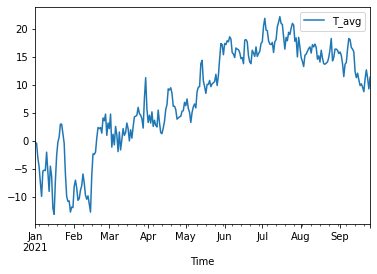

In [58]:
T_data.plot();

--------------

# Scripting to manage file collections

- Python offers powerful tools to work with files
- Can be very useful if you need to search, rename or move many files
- We will focus on `pathlib`
    - relatively new (since Python 3.4)
    - supports Unix-like systems and Windows
    - https://docs.python.org/3/library/pathlib.html
    - https://www.python.org/dev/peps/pep-0428/
- For an overview over other useful Python components for working with files, see https://docs.python.org/3/library/filesys.html

### Terminology: POSIX

- *Portable Operating System Interface*
- IEEE standard for many features of operating systems, including file system
- Most Unix and Unix-like operating systems, including macOS, are fully or mostly POSIX compliant
- https://en.wikipedia.org/wiki/POSIX

## What is a path?

- A way (path) to a directory or file on our system
- Each path has 
    - a starting point, 
    - steps (intermediate directories) and 
    - a destination (directory or file)
- Absolute paths
    - start from the root of the file system hierarchy or drive (Windows)
    - POSIX: start with `/`
    - Windows
        - start with drive letter, e.g., `C:`
        - start with `\\`
    - point to a uniquely defined place in the file system
- Relative paths
    - start from the directory "where we are": *current working directory* (cwd)
    - start with any other letter than `/` (Posix) or `\` (Windows)
    - starting point determines which file or directory a relative path points to
- Special paths
    - `.` is the current directory
    - `..` is the parent of the current directory
    - `~` is the user's home directory (Posix only)

## Pathlib: Pure and concrete paths

![](https://docs.python.org/3/_images/pathlib-inheritance.png)

- The diagram shows a hierarchy of *classes*
- `PurePath` is the most general path concept
    - Pure paths cannot "do" anything with real files, they just represent the path
    - `PurePosixPath` and `PureWindowsPath` are specialised for Posix resp Windows systems
    - You can create any type of pure path on any system
- `Path` is the general concept of a path connected to real files on disk
    - Will in practice always be either `PosixPath` (Linux, macOS) or `WindowsPath`
    - Via these *concrete* paths, you *can* work with and change files on disk
    - You cannot create a `WindowsPath` under Linux/macOS and vice versa
- We usually create a `Path` object. Pathlib makes sure it is handled correctly on the system we use.    

## Warning: Danger Zone!

Pathlib contains commands that can **delete files or directories**.

We will not use them here

## Working with Pathlib

In [59]:
from pathlib import Path

- Look at the current working directory

In [60]:
cwd = Path.cwd()
cwd

PosixPath('/Users/plesser/Courses/INF200/H2021/lectures/INF200_H21_L03')

- This is an absolute path
- Whether it is a `PosixPath` or `WindowsPath` depends on the system
- We can check a few things

In [61]:
cwd.exists()

True

In [62]:
cwd.is_dir()

True

In [63]:
cwd.is_file()

False

In [64]:
cwd.is_absolute()

True

In [65]:
cwd.as_uri()

'file:///Users/plesser/Courses/INF200/H2021/lectures/INF200_H21_L03'

- We can get the directory directly above `cwd`
- An all the parents up to the file system root

In [66]:
cwd.parent

PosixPath('/Users/plesser/Courses/INF200/H2021/lectures')

In [67]:
list(cwd.parents)

[PosixPath('/Users/plesser/Courses/INF200/H2021/lectures'),
 PosixPath('/Users/plesser/Courses/INF200/H2021'),
 PosixPath('/Users/plesser/Courses/INF200'),
 PosixPath('/Users/plesser/Courses'),
 PosixPath('/Users/plesser'),
 PosixPath('/Users'),
 PosixPath('/')]

- We see the parts of the path

In [68]:
cwd.parts

('/',
 'Users',
 'plesser',
 'Courses',
 'INF200',
 'H2021',
 'lectures',
 'INF200_H21_L03')

- We can create a relative path for the current directory

In [69]:
relpath = Path('.')
relpath

PosixPath('.')

In [70]:
relpath.is_absolute()

False

- Pathlib can resolve this to an absolute path

In [71]:
relpath.resolve()

PosixPath('/Users/plesser/Courses/INF200/H2021/lectures/INF200_H21_L03')

### Building paths

- Do not build paths by string addition, use pathlib
- This will ensure correct translation between `/` and `\` across systems
- Pathlib makes this very elegant, although the syntax looks confusing at first
- We want to go from our current directory (for lecture 3) and get a path to the directory for lecture 2

In [72]:
lec2 = Path('..') / 'INF200_H21_L02'
lec2

PosixPath('../INF200_H21_L02')

In [73]:
lec2.resolve()

PosixPath('/Users/plesser/Courses/INF200/H2021/lectures/INF200_H21_L02')

### Globbing: Looking at directories and files

- "Globbing" means to find all files or directories matching a pattern
- `*` is a wildcard matching anything, `?` matches any single letter
- `Path.glob()` returns a *generator*, we need to convert explicitly to a list or iterate

In [74]:
list(lec2.glob('*.csv'))

[PosixPath('../INF200_H21_L02/weather_umb_2012.csv'),
 PosixPath('../INF200_H21_L02/books.csv')]

In [75]:
for item in lec2.glob('*'):
    if item.is_file():
        print('FILE', end='')
    elif item.is_dir():
        print('DIR ', end='')
    else:
        print('????', end='')
    print(item)

FILE../INF200_H21_L02/INF200_H21_L02.ipynb
FILE../INF200_H21_L02/Aas dogn 2003-2012.xlsx
FILE../INF200_H21_L02/students.txt
FILE../INF200_H21_L02/weather_umb_2012.csv
FILE../INF200_H21_L02/students_with_birthday.txt
FILE../INF200_H21_L02/students_with_header.txt
FILE../INF200_H21_L02/books.csv
FILE../INF200_H21_L02/testfile_utf8.txt
FILE../INF200_H21_L02/testfile_plain.txt
DIR ../INF200_H21_L02/.ipynb_checkpoints
FILE../INF200_H21_L02/testfile_latin1.txt
FILE../INF200_H21_L02/testfile_win_utf8.txt


- `**` is a wildcard indicating recursives search through subdirectories

In [76]:
list(lec2.glob('**/*'))

[PosixPath('../INF200_H21_L02/INF200_H21_L02.ipynb'),
 PosixPath('../INF200_H21_L02/Aas dogn 2003-2012.xlsx'),
 PosixPath('../INF200_H21_L02/students.txt'),
 PosixPath('../INF200_H21_L02/weather_umb_2012.csv'),
 PosixPath('../INF200_H21_L02/students_with_birthday.txt'),
 PosixPath('../INF200_H21_L02/students_with_header.txt'),
 PosixPath('../INF200_H21_L02/books.csv'),
 PosixPath('../INF200_H21_L02/testfile_utf8.txt'),
 PosixPath('../INF200_H21_L02/testfile_plain.txt'),
 PosixPath('../INF200_H21_L02/.ipynb_checkpoints'),
 PosixPath('../INF200_H21_L02/testfile_latin1.txt'),
 PosixPath('../INF200_H21_L02/testfile_win_utf8.txt'),
 PosixPath('../INF200_H21_L02/.ipynb_checkpoints/INF200_H21_L02-checkpoint.ipynb')]

### Combining globbing and regex to find certain files

- We want to find all notebook files in all lecture material containing the word "program"
    - We use globbing to find files, looking only at directories for `L01` and `L02`
    - We then send each file through a regular expression search and print matching lines

In [77]:
r_prog = re.compile(r'\bprogram\b', flags=re.IGNORECASE)
for path in Path('..').glob('*_L0[12]/*.ipynb'):
    if path.is_dir():
        continue
    with path.open() as file:
        for line in file:
            if r_prog.search(line):
                print(f'{str(path):20s}: {line[:50]}')

../INF200_H21_L02/INF200_H21_L02.ipynb:     "- For storing data from a Python program to b
../INF200_H21_L01/INF200_H21_L01.ipynb:     "## Why learn to program (well)?\n",

../INF200_H21_L01/INF200_H21_L01.ipynb:     "- the insurance company faults your program f
../INF200_H21_L01/INF200_H21_L01.ipynb:     "    -   program code and documentation count 
../INF200_H21_L01/INF200_H21_L01.ipynb:     "The file `norway_municipalities_2017.csv` con
../INF200_H21_L01/INF200_H21_L01.ipynb:     "Write a program that works the same data as i


### Moving and renaming files

- In the following, we create some (meaningless) demonstration data in a nested set of directories
- We then extract information from each file and rename and move the file
- Directories `demo` and `demo_new` must not exist before the next cells are run. 
- **Any data in those directories may be affeced by this code!**

#### Generate demo data

In [78]:
demo_dir = Path('demo')

In [79]:
demo_dir.exists()

False

In [80]:
demo_dir.mkdir()

In [81]:
for n in range(4):
    sd = demo_dir / str(n)
    sd.mkdir()
    for fnum in range(3):
        cname = chr(97 + fnum)
        fname = sd / (cname + '.txt')
        with open(fname, 'w') as f:
            f.write(f'Customer nr: {n}\nCustomer name: {cname}\nPayload\n')

In [82]:
list(demo_dir.glob('**/*'))

[PosixPath('demo/0'),
 PosixPath('demo/1'),
 PosixPath('demo/3'),
 PosixPath('demo/2'),
 PosixPath('demo/0/c.txt'),
 PosixPath('demo/0/b.txt'),
 PosixPath('demo/0/a.txt'),
 PosixPath('demo/1/c.txt'),
 PosixPath('demo/1/b.txt'),
 PosixPath('demo/1/a.txt'),
 PosixPath('demo/3/c.txt'),
 PosixPath('demo/3/b.txt'),
 PosixPath('demo/3/a.txt'),
 PosixPath('demo/2/c.txt'),
 PosixPath('demo/2/b.txt'),
 PosixPath('demo/2/a.txt')]

In [83]:
print(open('demo/0/a.txt').read())

Customer nr: 0
Customer name: a
Payload



#### Re-organise files

- Files will be put to directory `demo_new`
- This will be a flat directory containing all files
- Each file will get a new name containing customer name and number

In [84]:
new_dir = Path('demo_new')
new_dir.mkdir()

for old_name in demo_dir.glob('**/*.txt'):
    with old_name.open() as f:
        c_num = int(f.readline().split(':')[-1].strip())
        c_name = f.readline().split(':')[-1].strip()
    new_name = new_dir / f'invoice_{c_name:s}_{c_num:03d}.dat'
    old_name.rename(new_name)

- We can now look at the content of the new directory
- All files have been renamed
- **If you do this for the first time, check that the files are intact and the correct files!**

In [85]:
list(new_dir.glob('**/*'))

[PosixPath('demo_new/invoice_c_001.dat'),
 PosixPath('demo_new/invoice_c_000.dat'),
 PosixPath('demo_new/invoice_c_002.dat'),
 PosixPath('demo_new/invoice_c_003.dat'),
 PosixPath('demo_new/invoice_b_002.dat'),
 PosixPath('demo_new/invoice_b_003.dat'),
 PosixPath('demo_new/invoice_b_001.dat'),
 PosixPath('demo_new/invoice_b_000.dat'),
 PosixPath('demo_new/invoice_a_001.dat'),
 PosixPath('demo_new/invoice_a_000.dat'),
 PosixPath('demo_new/invoice_a_002.dat'),
 PosixPath('demo_new/invoice_a_003.dat')]

- The original directory does not contain any files any more, just empty subdirectories.

In [86]:
list(demo_dir.glob('**/*'))

[PosixPath('demo/0'),
 PosixPath('demo/1'),
 PosixPath('demo/3'),
 PosixPath('demo/2')]